## Import required libraries

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('G:\College\Projects\Traffic_Sign')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [12]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [13]:
cur_path

'g:\\College\\Projects\\Traffic_Sign'

## Preprocess the images

In [14]:
for i in range(classes):
    path = os.path.join(cur_path,'Data/train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [19]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [20]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [21]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [22]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [25]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [27]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 196s 188ms/step - loss: 1.9727 - accuracy: 0.4971 - val_loss: 0.7367 - val_accuracy: 0.8184
Epoch 2/20
981/981 [==============================] - 185s 189ms/step - loss: 0.6936 - accuracy: 0.7941 - val_loss: 0.1913 - val_accuracy: 0.9531
Epoch 3/20
981/981 [==============================] - 252s 257ms/step - loss: 0.4199 - accuracy: 0.8745 - val_loss: 0.1360 - val_accuracy: 0.9620
Epoch 4/20
981/981 [==============================] - 230s 235ms/step - loss: 0.3385 - accuracy: 0.9031 - val_loss: 0.1097 - val_accuracy: 0.9697
Epoch 5/20
981/981 [==============================] - 206s 210ms/step - loss: 0.2956 - accuracy: 0.9173 - val_loss: 0.1825 - val_accuracy: 0.9509
Epoch 6/20
981/981 [==============================] - 244s 249ms/step - loss: 0.2727 - accuracy: 0.9262 - val_loss: 0.1323 - val_accuracy: 0.9635
Epoch 7/20


In [1]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

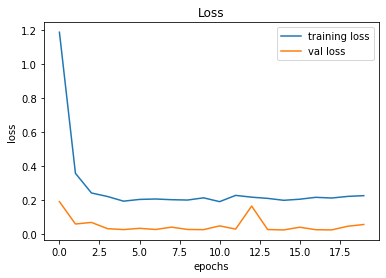

In [17]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [28]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [29]:
X_test, label = testing('./Data/Test.csv')

In [31]:
Y_pred = model.predict(X_test)
Y_pred

395/395 [==============================] - 23s 42ms/step


array([[5.7162426e-02, 1.5296759e-01, 4.6537118e-17, ..., 9.7114402e-08,
        1.5126062e-10, 4.7127483e-07],
       [8.4859408e-10, 3.8044243e-10, 5.8842435e-36, ..., 1.1086898e-16,
        3.5571013e-25, 8.7754246e-14],
       [7.0700111e-07, 8.1428746e-03, 1.7545084e-19, ..., 6.3209359e-07,
        4.2693293e-13, 9.6009053e-08],
       ...,
       [4.5784307e-03, 2.0644104e-02, 3.2921149e-10, ..., 5.7825804e-05,
        7.6253762e-08, 7.3910058e-05],
       [4.2264901e-02, 2.5628187e-02, 5.1121060e-05, ..., 3.5339619e-03,
        5.7897955e-04, 1.0260327e-02],
       [1.8062914e-02, 1.3878608e-01, 1.7181098e-07, ..., 4.0816166e-04,
        2.9319208e-06, 2.1986135e-03]], dtype=float32)

## Accuracy with the test data

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

## Save the model

In [33]:
model.save("./training/TSR.h5")

## Load the Model

In [34]:
import os
os.chdir(r'G:\College\Projects\Traffic_Sign')
from keras.models import load_model
model = load_model('./model/TSR.h5')

In [35]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [104]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    print(Y_pred)
    return image,Y_pred

1/1 [==============================] - 0s 124ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Predicted traffic sign is:  Speed limit (70km/h)


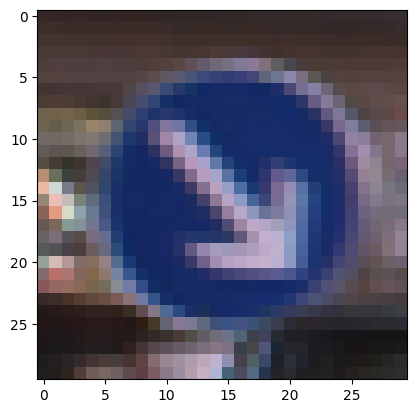

In [117]:
plot,prediction = test_on_img(r'G:\College\Projects\Traffic_Sign\Data\Test\00002.png')
s = [(str(i)[:1]) for i in prediction[0]]
a = int("".join(s)) % 42
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()